## Preprocessing:
------
The text ‘Tag’ column was vectorized using CountVectorizer, and the remaining text data was transformed through a column transformer during the modelling stage to prevent data leakage.

## Imports:
-----


In [430]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mlp

##### Importing the csv file:

In [431]:
df_processing = pd.read_csv('df_processing.csv') # reading  dataframe csv file, ready for preprocessing

In [432]:
import joblib

df_processing=joblib.load('df_processing.pkl')
df_processing

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202305,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",1394530,46778,501,9878,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,Find out more about Kingdom Hearts 3: https://...
202306,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13T21:58:43.000Z,[none],139733,11155,119,1968,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,Patreon: http://www.patreon.com/YMSTwitch: htt...
202307,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",26054,364,11,8,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,Günter versucht sich als Ersthelfer bei einem ...
202308,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",1139198,14900,1421,1587,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,"Vom verstoßenen Söldner zum legendären Helden,..."


## Preprocessing:
----
- Transforming categories to names
- One hot encoding
- Text processing

## Log Transformation to the data:
-----


In [433]:
columns_to_log = ['likes', 'dislikes','comment_count','views',] #applying log transformation to the skewed data using logp1 - adds a 1 to 0s 

# Apply log transformation to specific columns
df_processing[columns_to_log] = df_processing[columns_to_log].apply(lambda x: np.log1p(x))

## Getting Category names from JSON files
-----


In [434]:
df_processing.category_id #checking the category_id labels 

0         22
1         24
2         23
3         24
4         24
          ..
202305    20
202306    24
202307    24
202308    20
202309    23
Name: category_id, Length: 202310, dtype: int64

In [435]:
df_processing['category_id'].nunique() # number of unique category ids

18

In [436]:
import json

# load the json file
gb_cat_n = '../data/youtube-dataset/GB_category_id.json'

# read its contents
with open(gb_cat_n, 'r') as file:
    json_gb = json.load(file)

json_gb


{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [437]:
import json

# load the json file
fr_cat_n = '../data/youtube-dataset/FR_category_id.json'

# read its contents
with open(fr_cat_n, 'r') as file:
    json_fr = json.load(file)

json_fr

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [438]:
import json

# load the json file
us_cat_n = '../data/youtube-dataset/US_category_id.json'

# read its contents
with open(us_cat_n, 'r') as file:
    json_us = json.load(file)


json_us

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [439]:
import json

# load the json file
de_cat_n = '../data/youtube-dataset/DE_category_id.json'

# read its contents
with open(de_cat_n, 'r') as file:
    json_de = json.load(file)


json_de

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

Column titles were obtained by manual imputation- Looking up values from the uploaded json files and creating a new data frame column. When looking at the json files it was clear that all categories were consistent across the data.

In [440]:
# the code below will be rewritten into a function  
# new column for titles
df_processing['category_id_title']= df_processing['category_id'] 
#replacing the values
df_processing['category_id_title'].replace(29,'Activism and Nonprofits', inplace=True)
df_processing['category_id_title'].replace(30,'Movies',inplace=True)
df_processing['category_id_title'].replace(43,'Shows',inplace=True)
df_processing['category_id_title'].replace(15,'Pets and animals',inplace=True)
df_processing['category_id_title'].replace(17,'Sports',inplace=True)
df_processing['category_id_title'].replace(18,'Short Movies',inplace=True)
df_processing['category_id_title'].replace(25,'News and Politics',inplace=True)
df_processing['category_id_title'].replace(10,'Music',inplace=True)
df_processing['category_id_title'].replace(23,'Comedy',inplace=True)
df_processing['category_id_title'].replace(24,'Entertainment',inplace=True)
df_processing['category_id_title'].replace(27,'Education',inplace=True)
df_processing['category_id_title'].replace(1,'Film and Animation',inplace=True)
df_processing['category_id_title'].replace(2,'Vehicles',inplace=True) 
df_processing['category_id_title'].replace(28,'Science and Tech',inplace=True)
df_processing['category_id_title'].replace(19,'Travel and Events',inplace=True)
df_processing['category_id_title'].replace(20,'Gaming',inplace=True)
df_processing['category_id_title'].replace(22,'People and Blogs',inplace=True)
df_processing['category_id_title'].replace(44,'Trailers',inplace=True)  
df_processing['category_id_title'].replace(26,'Howto & Style',inplace=True) 


In [441]:
df_processing # checking values have been replaced. 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,category_id_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,13.525659,10.960027,7.995307,9.677528,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",14.698775,11.484382,8.723719,9.449672,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",14.975981,11.891595,8.582981,9.009692,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",12.745978,9.227492,6.502790,7.671827,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14.555413,11.792343,7.595890,9.771041,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202305,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",14.148069,10.753190,6.218600,9.198167,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,Find out more about Kingdom Hearts 3: https://...,Gaming
202306,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13T21:58:43.000Z,[none],11.847496,9.319733,4.787492,7.585281,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,Patreon: http://www.patreon.com/YMSTwitch: htt...,Entertainment
202307,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",10.167965,5.899897,2.484907,2.197225,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,Günter versucht sich als Ersthelfer bei einem ...,Entertainment
202308,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",13.945836,9.609184,7.259820,7.370231,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,"Vom verstoßenen Söldner zum legendären Helden,...",Gaming


##### Category id titles - relationship with views:

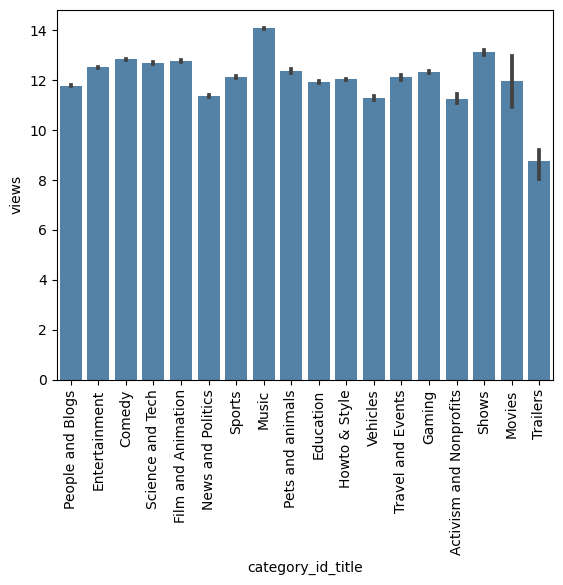

In [442]:
sns.barplot(x=df_processing['category_id_title'], y=df_processing['views'],color='steelblue')
plt.xticks(rotation=90)
plt.show()

##### NLP

In [443]:
df_rm_cols = df_processing.copy() # new columns to make changes on

In [444]:
df_rm_cols

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,category_id_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,13.525659,10.960027,7.995307,9.677528,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",14.698775,11.484382,8.723719,9.449672,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",14.975981,11.891595,8.582981,9.009692,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",12.745978,9.227492,6.502790,7.671827,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14.555413,11.792343,7.595890,9.771041,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202305,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",14.148069,10.753190,6.218600,9.198167,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,Find out more about Kingdom Hearts 3: https://...,Gaming
202306,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13T21:58:43.000Z,[none],11.847496,9.319733,4.787492,7.585281,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,Patreon: http://www.patreon.com/YMSTwitch: htt...,Entertainment
202307,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",10.167965,5.899897,2.484907,2.197225,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,Günter versucht sich als Ersthelfer bei einem ...,Entertainment
202308,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",13.945836,9.609184,7.259820,7.370231,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,"Vom verstoßenen Söldner zum legendären Helden,...",Gaming


## Converting Date to Date/time- Breaking down date columns into numerical values
----------

In [445]:
df_split_dates = df_rm_cols.copy() #new column to make changes on

In [446]:
df_split_dates.dtypes #observing data types

video_id              object
trending_date         object
title                 object
channel_title         object
category_id            int64
publish_time          object
tags                  object
views                float64
likes                float64
dislikes             float64
comment_count        float64
thumbnail_link        object
description           object
category_id_title     object
dtype: object

In [447]:
df_split_dates['trending_date'] #inspecting columns

0         17.14.11
1         17.14.11
2         17.14.11
3         17.14.11
4         17.14.11
            ...   
202305    18.14.06
202306    18.14.06
202307    18.14.06
202308    18.14.06
202309    18.14.06
Name: trending_date, Length: 202310, dtype: object

##### Trending_date:

In [448]:
df_split_dates['trending_date'] = pd.to_datetime(df_split_dates['trending_date'], format = '%y.%d.%m') #changing the format of the column.
df_split_dates['trending_date_month'] = pd.DatetimeIndex(df_split_dates['trending_date']).month #extracting the month. Created a new column in the dataframe.
df_split_dates['trending_date_day'] = pd.DatetimeIndex(df_split_dates['trending_date']).day  #extracting the day . Created a new column in the dataframe.
df_split_dates['trending_date_year'] = pd.DatetimeIndex(df_split_dates['trending_date']).year  #extracting the year . Created a new column in the dataframe.

In [449]:
df_split_dates.head() #confirming the datatype was converted to date/time.

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,category_id_title,trending_date_month,trending_date_day,trending_date_year
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,13.525659,10.960027,7.995307,9.677528,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs,11,14,2017
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",14.698775,11.484382,8.723719,9.449672,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment,11,14,2017
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",14.975981,11.891595,8.582981,9.009692,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,11,14,2017
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",12.745978,9.227492,6.502790,7.671827,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,Entertainment,11,14,2017
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14.555413,11.792343,7.595890,9.771041,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,Entertainment,11,14,2017


In [450]:
df_split_dates.head(3) # Confirming the new columns have been created with the appropriate values. 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,category_id_title,trending_date_month,trending_date_day,trending_date_year
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,13.525659,10.960027,7.995307,9.677528,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs,11,14,2017
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",14.698775,11.484382,8.723719,9.449672,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment,11,14,2017
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",14.975981,11.891595,8.582981,9.009692,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,11,14,2017


In [451]:
df_drpd_trnd_date= df_split_dates.copy() # copy of the dataframe with the previous changes.


In [452]:
df_drpd_trnd_date.drop(columns =['trending_date'], inplace=True) #dropping original column 

In [453]:
df_drpd_trnd_date['publish_time'].apply(lambda x:x[0:10]) #removing extra characters in the publish date.

0         2017-11-13
1         2017-11-13
2         2017-11-12
3         2017-11-13
4         2017-11-12
             ...    
202305    2018-06-12
202306    2018-06-13
202307    2018-06-12
202308    2018-06-11
202309    2018-06-13
Name: publish_time, Length: 202310, dtype: object

##### Cleaning the publish time column:

In [454]:
df_drpd_trnd_date['publish_time_clean']=df_drpd_trnd_date['publish_time'].apply(lambda x:x[0:10]) #creating a new column in the dataframe.

In [455]:
df_drpd_trnd_date.head() #checking the clean column has been added

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,category_id_title,trending_date_month,trending_date_day,trending_date_year,publish_time_clean
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,13.525659,10.960027,7.995307,9.677528,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs,11,14,2017,2017-11-13
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",14.698775,11.484382,8.723719,9.449672,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment,11,14,2017,2017-11-13
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",14.975981,11.891595,8.582981,9.009692,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,11,14,2017,2017-11-12
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",12.745978,9.227492,6.502790,7.671827,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,Entertainment,11,14,2017,2017-11-13
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14.555413,11.792343,7.595890,9.771041,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,Entertainment,11,14,2017,2017-11-12


In [456]:
df_drpd_trnd_date['publish_time_clean']

0         2017-11-13
1         2017-11-13
2         2017-11-12
3         2017-11-13
4         2017-11-12
             ...    
202305    2018-06-12
202306    2018-06-13
202307    2018-06-12
202308    2018-06-11
202309    2018-06-13
Name: publish_time_clean, Length: 202310, dtype: object

##### Publish_time:

In [457]:
df_drpd_trnd_date['publish_time_clean'] = pd.to_datetime(df_drpd_trnd_date['publish_time_clean'],format='%Y/%m/%d') #changing the format of the column

df_drpd_trnd_date['publish_time_month'] = pd.DatetimeIndex(df_drpd_trnd_date['publish_time_clean']).month #extracting the month. Created a new column in the dataframe.
df_drpd_trnd_date['publish_time_day'] = pd.DatetimeIndex(df_drpd_trnd_date['publish_time_clean']).day  #extracting the day . Created a new column in the dataframe.
df_drpd_trnd_date['publish_time_year'] = pd.DatetimeIndex(df_drpd_trnd_date['publish_time_clean']).year  #extracting the year . Created a new column in the dataframe.

In [458]:
df_drpd_trnd_date.head() #the five first rows of data

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,category_id_title,trending_date_month,trending_date_day,trending_date_year,publish_time_clean,publish_time_month,publish_time_day,publish_time_year
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,13.525659,10.960027,7.995307,9.677528,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs,11,14,2017,2017-11-13,11,13,2017
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",14.698775,11.484382,8.723719,9.449672,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment,11,14,2017,2017-11-13,11,13,2017
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",14.975981,11.891595,8.582981,9.009692,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,11,14,2017,2017-11-12,11,12,2017
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",12.745978,9.227492,6.502790,7.671827,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,Entertainment,11,14,2017,2017-11-13,11,13,2017
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14.555413,11.792343,7.595890,9.771041,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,Entertainment,11,14,2017,2017-11-12,11,12,2017


In [459]:
df_split_dates2=df_drpd_trnd_date.copy() #new data frame to make changes on

In [460]:
df_split_dates2.drop(columns =['publish_time'], inplace=True) #dropping original column

In [461]:
df_split_dates2.drop(columns =['publish_time_clean'], inplace=True) #dropping cleaned column

In [462]:
df_split_dates2.head() #shows the first 5 rows of data

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,description,category_id_title,trending_date_month,trending_date_day,trending_date_year,publish_time_month,publish_time_day,publish_time_year
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,13.525659,10.960027,7.995307,9.677528,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs,11,14,2017,11,13,2017
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",14.698775,11.484382,8.723719,9.449672,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment,11,14,2017,11,13,2017
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",14.975981,11.891595,8.582981,9.009692,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,11,14,2017,11,12,2017
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",12.745978,9.227492,6.502790,7.671827,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,Entertainment,11,14,2017,11,13,2017
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14.555413,11.792343,7.595890,9.771041,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,Entertainment,11,14,2017,11,12,2017


In [463]:
df_split_dates2.tail() #shows the last 5 rows of data

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,description,category_id_title,trending_date_month,trending_date_day,trending_date_year,publish_time_month,publish_time_day,publish_time_year
202305,fn5WNxy-Wcw,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",14.148069,10.753190,6.218600,9.198167,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,Find out more about Kingdom Hearts 3: https://...,Gaming,6,14,2018,6,12,2018
202306,zAFv43lxqHE,YMS: The Visit,YourMovieSucksDOTorg,24,[none],11.847496,9.319733,4.787492,7.585281,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,Patreon: http://www.patreon.com/YMSTwitch: htt...,Entertainment,6,14,2018,6,13,2018
202307,zSXG5I6Y2fA,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",10.167965,5.899897,2.484907,2.197225,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,Günter versucht sich als Ersthelfer bei einem ...,Entertainment,6,14,2018,6,12,2018
202308,5d115sePmaU,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,"Assassin's Creed|""Assassins Creed""|""Assassin's...",13.945836,9.609184,7.259820,7.370231,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,"Vom verstoßenen Söldner zum legendären Helden,...",Gaming,6,14,2018,6,11,2018
202309,go-F6xvezAM,Гироскутер - Азбука Уральских Пельменей Б - Ур...,Уральские Пельмени,23,"Гироскутер|""уральские пельмени гироскутер""|""мя...",12.664538,9.340930,5.866468,6.311735,https://i.ytimg.com/vi/go-F6xvezAM/default.jpg,Популярный номер из нового шоу Азбука Уральски...,Comedy,6,14,2018,6,13,2018


##### Views across publish time month:

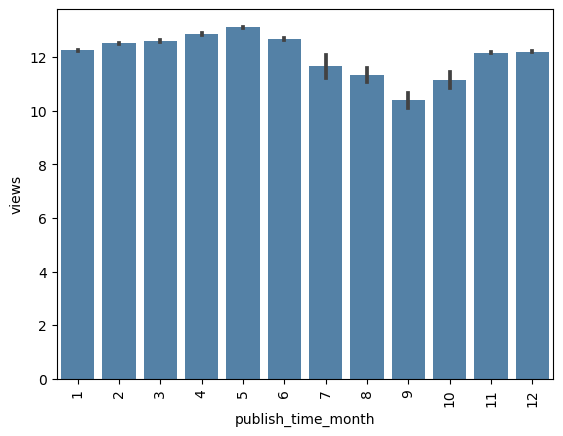

In [464]:
sns.barplot(x=df_split_dates2['publish_time_month'], y=df_split_dates2['views'],color='steelblue')
plt.xticks(rotation=90)
plt.show()

- Publish time month has a slight effect on the number of views. The number of views peaks slightly towards the middle of the year, and dips in september. 

##### Views across publish time day:

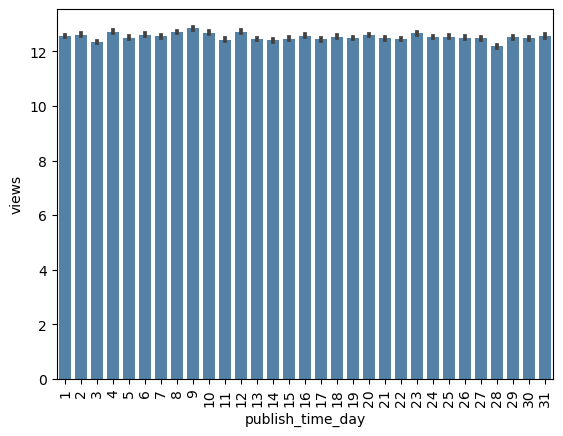

In [465]:
sns.barplot(x=df_split_dates2['publish_time_day'], y=df_split_dates2['views'],color='steelblue')
plt.xticks(rotation=90)
plt.show()

- Publish time day has little effect on the number of views. Values across each day follow a near consistent pattern.

##### Views across publish time year:

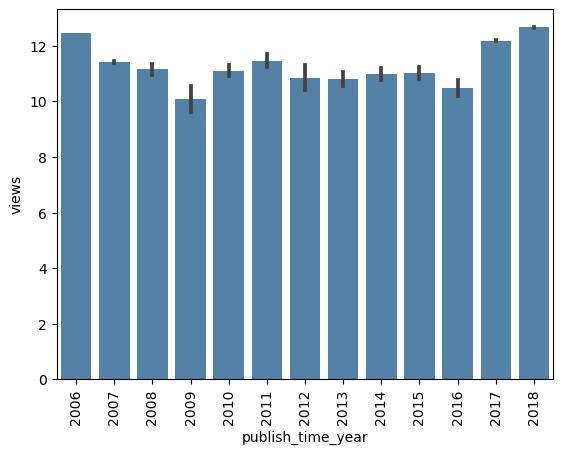

In [466]:
sns.barplot(x=df_split_dates2['publish_time_year'], y=df_split_dates2['views'],color='steelblue')
plt.xticks(rotation=90)
plt.show()

- Publish time year has a slight different on the number of views, towards the beginning and end of the dataset, the number of views peaks slightly.

## NLP - Natural Language Processing
-----

##### Data Partitioning: 

##### Splitting data in training and test:


In [467]:
#nltk.download('all')

In [468]:
## Vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK imports
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

In [469]:
X = df_split_dates2.drop(columns= 'views')
y = df_split_dates2['views']

In [470]:
#  training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#   training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [471]:
#remove custom stop words
new_stopwords = ['YouTube', 'Video', 'Watch']

In [472]:
#Load stop words
stop_words = stopwords.words('english','french')
#update the stopwords list
stop_words.extend(new_stopwords)
#use the list as an input to <stop_words> parameter
count_vectorizer = CountVectorizer(stop_words=stop_words, min_df=0.001, max_features=100)
#fit the vectorizer
count_vectorizer.fit(X_train['tags'])
#transform the target column
count_matrix_train = count_vectorizer.transform(X_train['tags'])
count_matrix_validation = count_vectorizer.transform(X_validation['tags'])
#print dimensions
print(count_matrix_train.shape)

/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['video', 'watch', 'youtube'] not in stop_words.
  warnings.warn(


(121386, 100)


In [473]:
#remove custom stop words
new_stopwords = ['YouTube', 'Video', 'Watch']

In [474]:
#French stopwords because the data set includes data from France.

import string
#Ensure nltk.stopwords is loaded
from nltk.corpus import stopwords
stop_words = stopwords.words('french')

print('The list of English stop words:', stop_words)

print('The list of punctuation from string library: ', string.punctuation)

The list of English stop words: ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai',

In [475]:
import string
#Ensure nltk.stopwords is loaded
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

print('The list of English stop words:', stop_words)

print('The list of punctuation from string library: ', string.punctuation)

The list of English stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only'

##### Top 25 most common words:

In [476]:
# top 25 most common words


# sum all the rows for each feature starting from the largest count
tags_df_train_counts = pd.DataFrame(
        {"counts": count_matrix_train.toarray().sum(axis=0)},
        index=count_vectorizer.get_feature_names_out()).sort_values("counts", ascending=False)

print('The most common words and their counts are:')
tags_df_train_counts[:25]

The most common words and their counts are:


,counts
2018,25054
video,20258
new,17815
music,17424
show,16246
funny,15601
news,14820
tv,13826
comedy,11187
2017,10303


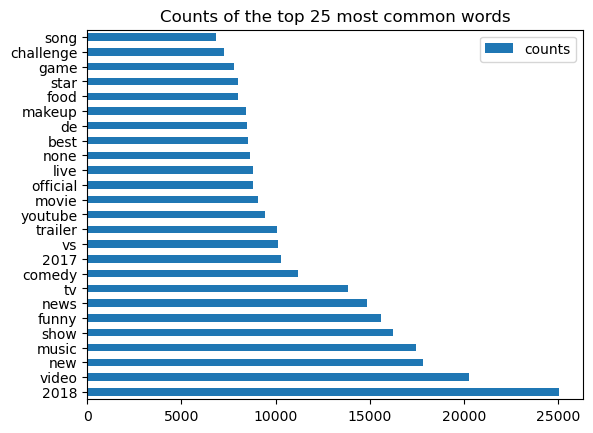

In [477]:
# Visualisation of top 25 most common words

tags_df_train_counts[:25].plot(kind='barh',title='Counts of the top 25 most common words');

In [478]:
#Turn words into data frame
vec_tags_validation= pd.DataFrame(count_matrix_validation.toarray(),columns=count_vectorizer.get_feature_names_out())
vec_tags_train= pd.DataFrame(count_matrix_train.toarray(),columns=count_vectorizer.get_feature_names_out())
vec_tags_train

,10,2017,2018,beauty,best,black,bölüm,cat,celebrity,challenge,...,tv,video,videos,vlog,voice,vs,wars,world,youtube,مسلسل
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121382,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
121383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121384,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Merging the vectoized text with the rest of the data frames:
------

In [479]:
# Original training data - will need to create a new baseline data frame and remove all non numerical columns. 
X_train.head(30)

,video_id,title,channel_title,category_id,tags,likes,dislikes,comment_count,thumbnail_link,description,category_id_title,trending_date_month,trending_date_day,trending_date_year,publish_time_month,publish_time_day,publish_time_year
49510,QAlneHXV_kw,شاهد ماذا قال جينيرال في الجيش الاسرائيلي عن ا...,Deutsch Algerien,17,[none],7.266129,4.919981,5.690359,https://i.ytimg.com/vi/QAlneHXV_kw/default.jpg,الجزائر Algerie,Sports,12,26,2017,12,25,2017
55308,R8f-9wOsI0A,PROMESSE...,KaraL,20,"youtubeuse""|""fr""|""trailer""|""gameplay fr""|""game...",8.422443,3.526361,7.125283,https://i.ytimg.com/vi/R8f-9wOsI0A/default.jpg,"(Nous ne sommes pas tout à fait 300k, je sais ...",Gaming,1,26,2018,1,25,2018
69020,bObIoWlJ_sI,Le Zap'Gym n°134,OGC Nice,17,"ogc""|""nice;""|""ogcn;""|""football""|""zapping""|""lig...",5.468060,1.609438,2.639057,https://i.ytimg.com/vi/bObIoWlJ_sI/default.jpg,"Images inédites, insolites ou déjà cultes : re...",Sports,4,5,2018,4,4,2018
143708,WLC1AuUP18s,JUMP TO TOUCH,SMTOWN,10,"NCT|""NCT 2018""|""TAEYONG""|""JAEHYUN""|""JUNGWOO""|""...",11.119735,5.361292,8.478244,https://i.ytimg.com/vi/WLC1AuUP18s/default.jpg,NCT 127 Official\nhttp://www.nct2018.com\nhttp...,Music,3,11,2018,3,10,2018
186040,bJ5LPrrDtek,ذا فويس الحلقه 6 الموسم الرابع Mbc the Voice,NAJDAT Hasan,10,[none],7.285507,5.361292,5.976351,https://i.ytimg.com/vi/bJ5LPrrDtek/default.jpg,شخص يحاول إسعاد الا خرين.\nفإبتسم دائمأ ياصديق...,Music,3,19,2018,3,17,2018
200568,v-dfygYIfLs,Old School Trick Shots | Dude Perfect,Dude Perfect,17,"dude perfect|""dude perfect stereotypes""|""dude ...",12.819706,8.937613,10.384369,https://i.ytimg.com/vi/v-dfygYIfLs/default.jpg,It’s time to look old! Special thanks to the U...,Sports,6,6,2018,6,4,2018
33887,13xFL17XmYU,Little Kid Runs in Slow Motion During Baseball...,RM Videos,24,[none],6.732211,4.663439,5.451038,https://i.ytimg.com/vi/13xFL17XmYU/default.jpg,For licensing/usage please contact: licensing(...,Entertainment,5,10,2018,4,30,2018
136769,QeFwtA3p4Mw,"Kendrick Lamar, U2, Dave Chappelle - Performan...",KendrickLamarVEVO,10,"Kendrick Lamar|""TDE""|""hip-hop""|""DAMN""|""Black P...",11.445899,7.190676,8.627482,https://i.ytimg.com/vi/QeFwtA3p4Mw/default.jpg,DAMN. available now http://smarturl.it/DAMN\n\...,Music,2,5,2018,2,4,2018
149691,HQiXNlhjxNI,THIS WEEK /w George Stephanopoulos 4/15/18 - T...,ORANGE POLITICS,25,[none],5.402677,3.871201,5.583496,https://i.ytimg.com/vi/HQiXNlhjxNI/default.jpg,NaN,News and Politics,4,16,2018,4,15,2018
105631,dzxFdtWmjto,VENOM - Official Teaser Trailer (HD),Sony Pictures Entertainment,24,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",12.294491,10.152182,10.463903,https://i.ytimg.com/vi/dzxFdtWmjto/default.jpg,Watch the #Venom teaser trailer now. 10.5.18.\...,Entertainment,3,15,2018,2,8,2018


 ## X and y train Baseline :
 -----

In [480]:
# X train data:
#concatenate data with original dataframe - save under new variable for modelling - find the train for t
X_train_baseline = pd.concat([X_train.reset_index(drop=True), vec_tags_train.reset_index(drop=True)], axis=1)

# not concatenating the y train 
y_train_baseline=y_train.reset_index(drop=True)


In [481]:
y_train_baseline

0         11.748440
1          9.920443
2          8.651374
3         12.838232
4         12.418580
            ...    
121381    15.191185
121382    15.763907
121383    11.302945
121384    11.556062
121385     8.505728
Name: views, Length: 121386, dtype: float64

##### Dropping non numerical columns for the baseline model:

In [482]:
# preview all non numeric columns 
non_num_col=X_train_baseline.select_dtypes('object').columns
non_num_col

Index(['video_id', 'title', 'channel_title', 'tags', 'thumbnail_link',
       'description', 'category_id_title'],
      dtype='object')

In [483]:
#Dropping all non numeric columns for the baseline model
X_train_baseline.drop(columns = non_num_col, inplace=True)

In [484]:
#Printing the dataframe for the baseline model - X train
X_train_baseline

,category_id,likes,dislikes,comment_count,trending_date_month,trending_date_day,trending_date_year,publish_time_month,publish_time_day,publish_time_year,...,tv,video,videos,vlog,voice,vs,wars,world,youtube,مسلسل
0,17,7.266129,4.919981,5.690359,12,26,2017,12,25,2017,...,0,0,0,0,0,0,0,0,0,0
1,20,8.422443,3.526361,7.125283,1,26,2018,1,25,2018,...,0,0,0,0,0,0,0,0,0,0
2,17,5.468060,1.609438,2.639057,4,5,2018,4,4,2018,...,0,0,0,0,0,0,0,0,0,0
3,10,11.119735,5.361292,8.478244,3,11,2018,3,10,2018,...,0,0,0,0,0,0,0,0,0,0
4,10,7.285507,5.361292,5.976351,3,19,2018,3,17,2018,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121381,10,11.376407,7.412764,8.197539,4,25,2018,4,12,2018,...,0,0,0,0,0,0,0,0,0,0
121382,10,12.776247,10.480494,10.527526,5,4,2018,5,1,2018,...,0,2,0,0,0,0,0,0,0,0
121383,22,5.036953,2.944439,3.135494,4,4,2018,3,28,2018,...,0,0,0,0,0,0,0,0,0,0
121384,24,8.253228,3.401197,5.899897,1,12,2018,1,11,2018,...,0,0,0,0,0,0,0,0,0,0


## X validation Baseline:
----
This data will be used for the Baseline linear regression model. The Baseline model will only include the tags column, all other text data will be vectorized within a pipeline to mitigate data leakage. 

In [485]:
# X validation data:

#concatenate data with original dataframe - save under new variable for modelling
X_validation_baseline = pd.concat([X_validation.reset_index(drop=True), vec_tags_validation.reset_index(drop=True)], axis=1)

# not concatenating y validation
y_validation_baseline=y_validation.reset_index(drop=True)


In [486]:
X_validation.shape

(40462, 17)

In [487]:
# preview all non numeric columns 
non_num_col=X_validation_baseline.select_dtypes('object').columns
X_validation_baseline.drop(columns = non_num_col, inplace=True)

#preview the validation baseline column


In [488]:
X_validation_baseline

,category_id,likes,dislikes,comment_count,trending_date_month,trending_date_day,trending_date_year,publish_time_month,publish_time_day,publish_time_year,...,tv,video,videos,vlog,voice,vs,wars,world,youtube,مسلسل
0,25,4.983607,3.044522,4.094345,3,23,2018,3,22,2018,...,0,0,0,0,0,0,0,0,0,0
1,22,7.812783,3.713572,4.624973,12,26,2017,12,23,2017,...,0,0,0,0,0,0,0,0,0,0
2,43,7.937732,6.900731,5.802118,12,22,2017,12,21,2017,...,0,0,0,0,0,0,0,0,0,0
3,23,9.277812,4.787492,6.298949,2,6,2018,1,30,2018,...,0,0,3,0,0,0,0,0,0,0
4,20,10.635086,6.855409,9.471858,2,27,2018,2,23,2018,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40457,24,9.371268,6.514713,6.962243,1,2,2018,12,31,2017,...,0,0,0,0,0,0,0,0,0,0
40458,22,12.964148,8.479907,10.529907,5,22,2018,5,5,2018,...,0,0,0,0,0,0,0,0,0,0
40459,24,4.382027,0.693147,1.609438,1,27,2018,1,26,2018,...,0,0,0,0,0,0,0,0,0,0
40460,24,9.363576,7.454720,7.126087,12,17,2017,12,6,2017,...,0,1,0,0,0,0,0,0,0,0


## Scaling the data using MinMax Scaler
-----

In [489]:
#Imports:
from sklearn.preprocessing import MinMaxScaler

In [490]:
#instantiate the scaler
mm_scaler = MinMaxScaler()

#fit the scaler - X_train only-
mm_scaler.fit(X_train_baseline)

#transform the data - X_train & X_validation - 
X_train_scaled_basel = mm_scaler.transform(X_train_baseline) # test?
X_validation_scaled_basel = mm_scaler.transform(X_validation_baseline)

In [491]:
X_validation_scaled_baseline = pd.DataFrame(X_validation_scaled_basel, columns=X_validation_baseline.columns)

In [492]:
X_validation_scaled_baseline

,category_id,likes,dislikes,comment_count,trending_date_month,trending_date_day,trending_date_year,publish_time_month,publish_time_day,publish_time_year,...,tv,video,videos,vlog,voice,vs,wars,world,youtube,مسلسل
0,0.558140,0.320680,0.210246,0.286279,0.181818,0.733333,1.0,0.181818,0.700000,1.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.488372,0.502729,0.256449,0.323381,1.000000,0.833333,0.0,1.000000,0.733333,0.916667,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.976744,0.510769,0.476545,0.405687,1.000000,0.700000,0.0,1.000000,0.666667,0.916667,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.511628,0.596999,0.330611,0.440426,0.090909,0.166667,1.0,0.000000,0.966667,1.000000,...,0.0,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.441860,0.684336,0.473415,0.662278,0.090909,0.866667,1.0,0.090909,0.733333,1.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40457,0.534884,0.603013,0.449888,0.486804,0.000000,0.033333,1.0,1.000000,1.000000,0.916667,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40458,0.488372,0.834204,0.585598,0.736257,0.363636,0.700000,1.0,0.363636,0.133333,1.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40459,0.534884,0.281970,0.047867,0.112533,0.000000,0.866667,1.0,0.000000,0.833333,1.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40460,0.534884,0.602518,0.514802,0.498260,1.000000,0.533333,0.0,1.000000,0.166667,0.916667,...,0.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [493]:
X_train_scaled_baseline = pd.DataFrame(X_train_scaled_basel, columns=X_train_baseline.columns)

In [494]:
X_train_scaled_baseline

,category_id,likes,dislikes,comment_count,trending_date_month,trending_date_day,trending_date_year,publish_time_month,publish_time_day,publish_time_year,...,tv,video,videos,vlog,voice,vs,wars,world,youtube,مسلسل
0,0.372093,0.467553,0.339760,0.397873,1.000000,0.833333,0.0,1.000000,0.800000,0.916667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.441860,0.541959,0.243520,0.498204,0.000000,0.833333,1.0,0.000000,0.800000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.372093,0.351853,0.111143,0.184524,0.272727,0.133333,1.0,0.272727,0.100000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.209302,0.715521,0.370236,0.592804,0.181818,0.333333,1.0,0.181818,0.300000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.209302,0.468800,0.370236,0.417870,0.181818,0.600000,1.0,0.181818,0.533333,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121381,0.209302,0.732037,0.511904,0.573177,0.272727,0.800000,1.0,0.272727,0.366667,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121382,0.209302,0.822113,0.723753,0.736091,0.363636,0.100000,1.0,0.363636,0.000000,1.000000,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121383,0.488372,0.324113,0.203335,0.219236,0.272727,0.100000,1.0,0.181818,0.900000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121384,0.534884,0.531070,0.234877,0.412524,0.000000,0.366667,1.0,0.000000,0.333333,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Transferring files to joblib
----

##### Data frames for the baseline model:

In [495]:
X_train_scaled_baseline.shape

(121386, 110)

In [496]:
y_train_baseline.shape

(121386,)

In [497]:

joblib.dump(X_train_scaled_baseline,'X_train_scaled_baseline.pkl')
joblib.dump(X_validation_scaled_baseline,'X_validation_scaled_baseline.pkl')
joblib.dump(y_validation_baseline ,'y_validation_baseline.pkl')
joblib.dump(y_train_baseline ,'y_train_baseline.pkl')

['y_train_baseline.pkl']

##### Dataframe for the grid search:

In [498]:
joblib.dump(df_split_dates2,'df_grid.pkl')

joblib.dump(X_train,'X_train.pkl')
joblib.dump(y_train,'y_train.pkl')

joblib.dump(X_validation,'X_validation.pkl')
joblib.dump(y_validation,'y_validation.pkl')

['y_validation.pkl']